In [1]:
# Grupo 1 - notebook_titanicsurvivalprediction

import numpy as np # Manipulação de matrizes
import pandas as pd # Criação e manipulação de dataset
%matplotlib inline
from pandas import *
import matplotlib.pyplot as plt # Plotagem de dados
import matplotlib.font_manager
import seaborn as sns # Plotagem e visualização dos dados
from tabulate import tabulate
from scipy.stats import chi2_contingency
import warnings

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


In [2]:
# Criando dataset
df = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")

In [3]:
# Visualização inicial do dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Número de linhas do Data Frame
df.shape

(891, 12)

In [5]:
# Colunas presentes no Data Frame
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
# Informações sobre o conjunto de dados
print("\nInformações sobre o conjunto de dados:")
print(df.info())


Informações sobre o conjunto de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [7]:
# Avaliando a existência de dados nulos
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Avaliando valores nulos
df[df.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [9]:
# Calculando a porcentagem de valores não nulos em cada coluna
total_rows = len(df)
percentages = (df.count() / total_rows) * 100

# Mostrando os valores em porcentagem
print("\nPorcentagem de valores não nulos em cada coluna:")
print(percentages) 


Porcentagem de valores não nulos em cada coluna:
PassengerId    100.000000
Survived       100.000000
Pclass         100.000000
Name           100.000000
Sex            100.000000
Age             80.134680
SibSp          100.000000
Parch          100.000000
Ticket         100.000000
Fare           100.000000
Cabin           22.895623
Embarked        99.775533
dtype: float64


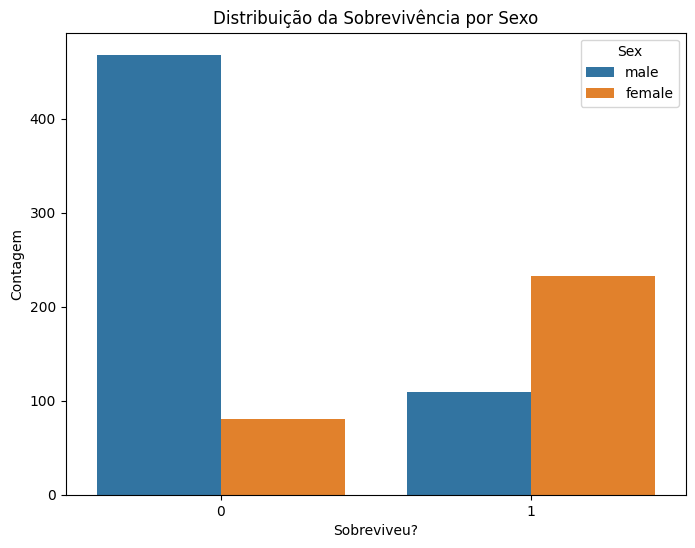

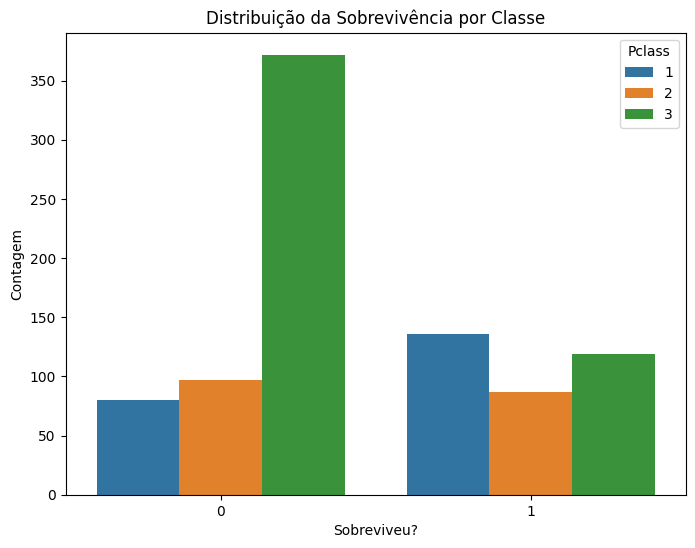

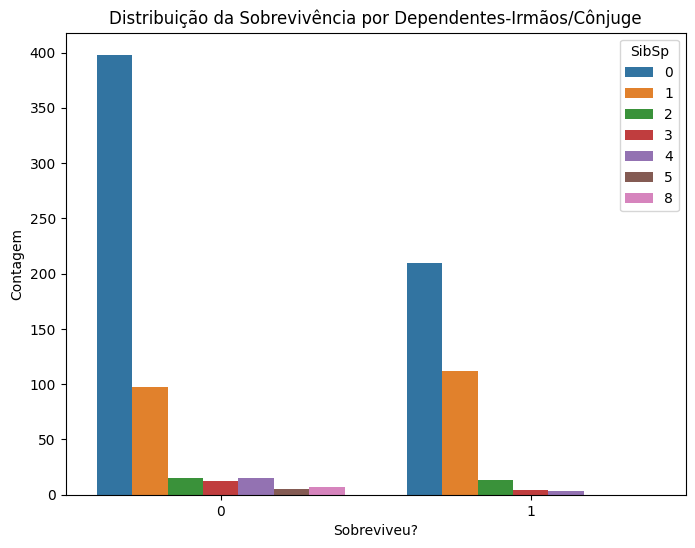

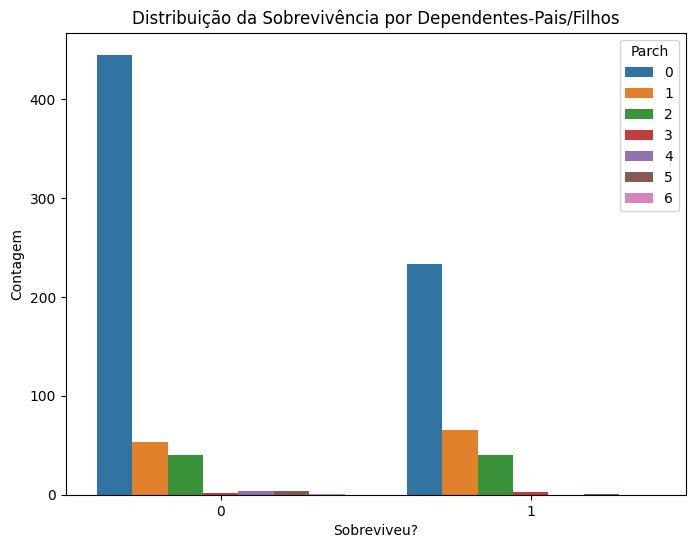

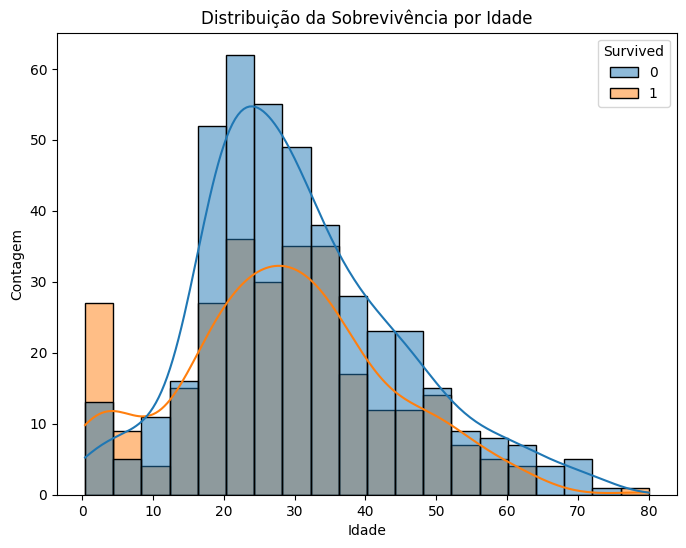

In [10]:
# Remover avisos
# import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Gráfico: Distribuição da sobrevivência por sexo
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Survived', hue='Sex')
plt.title('Distribuição da Sobrevivência por Sexo')
plt.xlabel('Sobreviveu?')
plt.ylabel('Contagem')
plt.show()

# Gráfico: Distribuição da sobrevivência por classe
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Survived', hue='Pclass')
plt.title('Distribuição da Sobrevivência por Classe')
plt.xlabel('Sobreviveu?')
plt.ylabel('Contagem')
plt.show()

# Gráfico: Distribuição da sobrevivência por dependentes
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Survived', hue='SibSp')
plt.title('Distribuição da Sobrevivência por Dependentes-Irmãos/Cônjuge')
plt.xlabel('Sobreviveu?')
plt.ylabel('Contagem')
plt.show()

# Gráfico: Distribuição da sobrevivência por dependentes
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Survived', hue='Parch')
plt.title('Distribuição da Sobrevivência por Dependentes-Pais/Filhos')
plt.xlabel('Sobreviveu?')
plt.ylabel('Contagem')
plt.show()

# Gráfico: Distribuição da sobrevivência por idade
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', hue='Survived', kde=True)
plt.title('Distribuição da Sobrevivência por Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()


In [11]:
# Calcula as estatísticas descritivas
statistics = df.describe(include='all')

# Imprimir as estatísticas descritivas em uma tabela formatada
print("Estatísticas Descritivas:")
print(tabulate(statistics, headers='keys', tablefmt='fancy_grid'))

Estatísticas Descritivas:
╒════════╤═══════════════╤════════════╤════════════╤═════════════════════════╤═══════╤══════════╤════════════╤════════════╤══════════╤══════════╤═════════╤════════════╕
│        │   PassengerId │   Survived │     Pclass │ Name                    │ Sex   │      Age │      SibSp │      Parch │   Ticket │     Fare │ Cabin   │ Embarked   │
╞════════╪═══════════════╪════════════╪════════════╪═════════════════════════╪═══════╪══════════╪════════════╪════════════╪══════════╪══════════╪═════════╪════════════╡
│ count  │       891     │ 891        │ 891        │ 891                     │ 891   │ 714      │ 891        │ 891        │      891 │ 891      │ 204     │ 889        │
├────────┼───────────────┼────────────┼────────────┼─────────────────────────┼───────┼──────────┼────────────┼────────────┼──────────┼──────────┼─────────┼────────────┤
│ unique │       nan     │ nan        │ nan        │ 891                     │ 2     │ nan      │ nan        │ nan        │      

In [12]:
# Calcular as taxas de sobrevivência
survival_rate_Sex = df.groupby('Sex')['Survived'].mean()
survival_rate_Pclass = df.groupby('Pclass')['Survived'].mean()
survival_rate_Age = df.groupby(pd.cut(df['Age'], bins=[0, 18, 30, 50, 100]))['Survived'].mean()
survival_rate_SibSp = df.groupby('SibSp')['Survived'].mean()
survival_rate_Parch = df.groupby('Parch')['Survived'].mean()

# Memória de Cálculo
print("Taxa de Sobrevivência por Sexo:")
print(tabulate(survival_rate_Sex.reset_index(), headers='keys', tablefmt='fancy_grid'))
print("\nTaxa de Sobrevivência por Classe Socioeconômica:")
print(tabulate(survival_rate_Pclass.reset_index(), headers='keys', tablefmt='fancy_grid'))
print("\nTaxa de Sobrevivência por Faixa Etária:")
print(tabulate(survival_rate_Age.reset_index(), headers='keys', tablefmt='fancy_grid'))
print("\nTaxa de Sobrevivência por Dependentes-Irmãos/Cônjuge:")
print(tabulate(survival_rate_SibSp.reset_index(), headers='keys', tablefmt='fancy_grid'))
print("Taxa de Sobrevivência por Dependentes-Pais/Filhos:")
print(tabulate(survival_rate_Parch.reset_index(), headers='keys', tablefmt='fancy_grid'))

# Fórmulas
print("\nFórmulas Utilizadas:")
print("Taxa de Sobrevivência por Sexo: (Número de Sobreviventes do Sexo / Número Total de Passageiros do Sexo)")
print("Taxa de Sobrevivência por Classe Socioeconômica: (Número de Sobreviventes da Classe / Número Total de Passageiros da Classe)")
print("Taxa de Sobrevivência por Faixa Etária: (Número de Sobreviventes na Faixa Etária / Número Total de Passageiros na Faixa Etária)")
print("Taxa de Sobrevivência por Faixa Etária: (Número de Sobreviventes de Dependentes-Irmãos/Cônjuge / Número Total de Passageiros Dependentes-Irmãos/Cônjuge)")
print("Taxa de Sobrevivência por Faixa Etária: (Número de Sobreviventes de Dependentes-Pais/Filhos / Número Total de Passageiros Dependentes-Pais/Filhos)")


Taxa de Sobrevivência por Sexo:
╒════╤════════╤════════════╕
│    │ Sex    │   Survived │
╞════╪════════╪════════════╡
│  0 │ female │   0.742038 │
├────┼────────┼────────────┤
│  1 │ male   │   0.188908 │
╘════╧════════╧════════════╛

Taxa de Sobrevivência por Classe Socioeconômica:
╒════╤══════════╤════════════╕
│    │   Pclass │   Survived │
╞════╪══════════╪════════════╡
│  0 │        1 │   0.62963  │
├────┼──────────┼────────────┤
│  1 │        2 │   0.472826 │
├────┼──────────┼────────────┤
│  2 │        3 │   0.242363 │
╘════╧══════════╧════════════╛

Taxa de Sobrevivência por Faixa Etária:
╒════╤═══════════╤════════════╕
│    │ Age       │   Survived │
╞════╪═══════════╪════════════╡
│  0 │ (0, 18]   │   0.503597 │
├────┼───────────┼────────────┤
│  1 │ (18, 30]  │   0.355556 │
├────┼───────────┼────────────┤
│  2 │ (30, 50]  │   0.423237 │
├────┼───────────┼────────────┤
│  3 │ (50, 100] │   0.34375  │
╘════╧═══════════╧════════════╛

Taxa de Sobrevivência por Dependentes-Irmã

<Figure size 3000x1500 with 0 Axes>

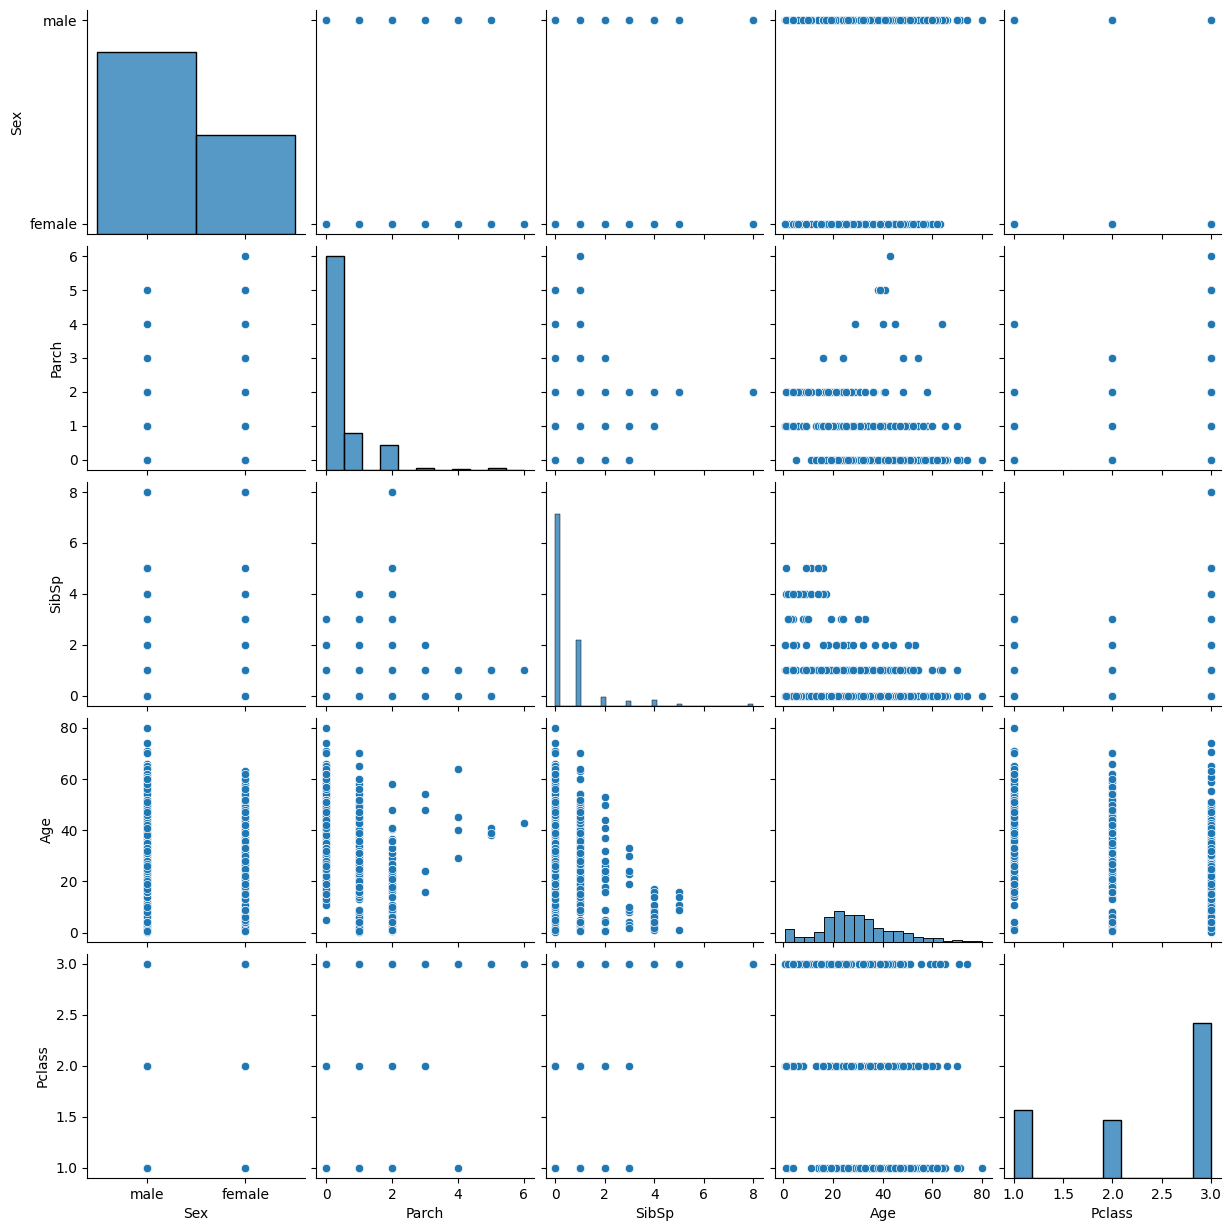

In [13]:
# Convertendo infinitos para NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Matriz de dispersão
plt.figure(figsize=(30, 15))
sns.pairplot(df, x_vars=['Sex', 'Parch', 'SibSp', 'Age', 'Pclass'], y_vars=['Sex', 'Parch', 'SibSp', 'Age', 'Pclass'])

<Axes: >

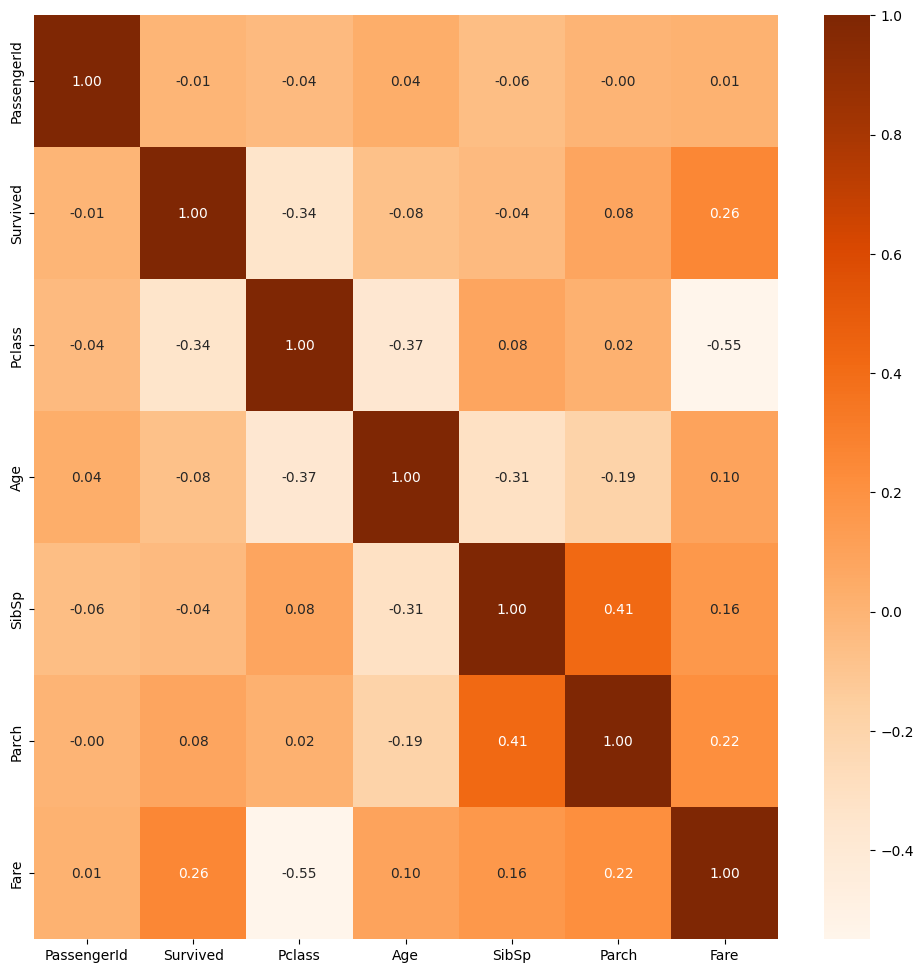

In [14]:
# matriz de correlação
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 12))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Oranges', fmt='.2f')